# Transfer Learning Project - Part 2

In [1]:
import pandas as pd
import numpy as np
from numpy import load
import os
from os import listdir
from os.path import exists
from matplotlib.image import imread 
import matplotlib.pyplot as plt
import keras
from keras import layers, optimizers
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout, GlobalMaxPooling2D, Conv2D, Input
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

## Model Construction

In [ ]:
vgg_model = VGG16(weights = 'imagenet', include_top = True)

Checking the VGG16 model

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Making the layers untrainable

In [ ]:
for layers in (vgg_model.layers)[:19]:
    print(layers)
    layers.trainable = False

In [ ]:
X = vgg_model.layers[-2].output #fc2 's output

In [ ]:
predictions = Dense(2, activation = 'softmax')(X)

In [ ]:
model_final = Model(inputs = vgg_model.input, outputs = predictions)

In [ ]:
model_final.compile(loss = 'categorical_crossentropy', 
                    optimizer = SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'])

C:\Users\bahao\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

##### Loading data from numpy files

In [ ]:
x_train = load('./data/x_train.npy', allow_pickle=True)
y_train = load('./data/y_train.npy', allow_pickle=True)

x_valid = load('./data/x_valid.npy', allow_pickle=True)
y_valid = load('./data/y_valid.npy', allow_pickle=True)

x_test = load('./data/x_test.npy', allow_pickle=True)
y_test = load('./data/y_test.npy', allow_pickle=True)

##### Converting data reading from numpy file to integer

In [ ]:
def str2int(labels):
  labels_ = []
  for label in labels:
    if label == 'Cat':
      labels_.append(0)
    elif label == 'Dog':
      labels_.append(1)
  return np.asarray(labels_)

y_train = str2int(y_train)
y_valid = str2int(y_valid)
y_test = str2int(y_test)

In [ ]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, 
                             mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=40, verbose=1, mode='auto')

In [ ]:
path = "weights/vgg16_1.h5"
if exists(path):
    model_final.load_weights('weights/vgg16_1.h5')
else:
    hist = model.fit(x=x_train, y=y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpoint, early])

C:\Users\bahao\AppData\Local\Temp\ipykernel_20372\4277539412.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 2,


Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.96875, saving model to vgg16_1.h5
2/2 [==============================] - 13s 9s/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9688
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 0.0459 - accuracy: 0.9844
Epoch 2: val_accuracy did not improve from 0.96875
2/2 [==============================] - 10s 7s/step - loss: 0.0459 - accuracy: 0.9844 - val_loss: 0.1285 - val_accuracy: 0.9688
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.9844
Epoch 3: val_accuracy improved from 0.96875 to 1.00000, saving model to vgg16_1.h5
2/2 [==============================] - 13s 9s/step - loss: 0.0671 - accuracy: 0.9844 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 1.0000
Epoch 4: val_accuracy did not imp

Epoch 31/100
2/2 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9844
Epoch 31: val_accuracy did not improve from 1.00000
2/2 [==============================] - 12s 8s/step - loss: 0.0352 - accuracy: 0.9844 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 32/100
2/2 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 32: val_accuracy did not improve from 1.00000
2/2 [==============================] - 12s 8s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 33/100
2/2 [==============================] - ETA: 0s - loss: 0.1256 - accuracy: 0.9688
Epoch 33: val_accuracy did not improve from 1.00000
2/2 [==============================] - 12s 8s/step - loss: 0.1256 - accuracy: 0.9688 - val_loss: 0.0342 - val_accuracy: 1.0000
Epoch 34/100
2/2 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 1.0000
Epoch 34: val_accuracy did not improve from 1.00000
2/2 [==============================

In [ ]:
if not os.path.exists("weights"):
    os.mkdir("weights")

model_final.save_weights("weights/vgg16_1.h5")

Evaluation of the trained model

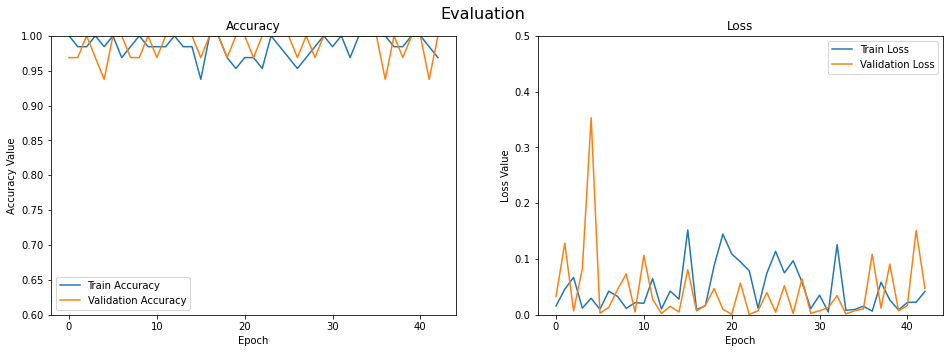

In [ ]:
%matplotlib inline

model_hist = pd.DataFrame(hist.history)
model_hist['epoch'] = hist.epoch 


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
num_epochs = model_hist.shape[0]
t = fig.suptitle('Evaluation', fontsize = 16)
fig.subplots_adjust(top=0.9)
ax1.set_ylim((0.6,1))
ax2.set_ylim((0,0.5))

ax1.plot(np.arange(0, num_epochs), model_hist["accuracy"], 
        label="Train Accuracy")
ax1.plot(np.arange(0, num_epochs), model_hist["val_accuracy"], 
        label="Validation Accuracy")
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend()


ax2.plot(np.arange(0, num_epochs), model_hist["loss"], 
        label="Train Loss")
ax2.plot(np.arange(0, num_epochs), model_hist["val_loss"], 
        label="Validation Loss")
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l1 = ax2.legend()